Project description: This is a PUBG game Data Set. The dataset contains a large number of anonymized game stats for a single player with all match types. The target is to create a ML model which predicts players' finishing placement based on their final stats.


In [1]:
import numpy as np
import pandas as pd
# handling warning 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('pubg.csv')
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [4]:
df.shape

(4446966, 29)

In [5]:
df.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,...,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446965e+06
mean,2.338149e-01,1.106908e+00,1.307171e+02,6.578755e-01,2.268196e-01,1.370147e+00,4.759935e+01,5.050060e+02,9.247833e-01,5.439551e-01,...,1.646590e-01,6.061157e+02,3.496091e-03,4.509322e+00,2.386841e-02,7.918208e-03,1.154218e+03,3.660488e+00,6.064601e+02,4.728216e-01
std,5.885731e-01,1.715794e+00,1.707806e+02,1.145743e+00,6.021553e-01,2.679982e+00,2.746294e+01,6.275049e+02,1.558445e+00,7.109721e-01,...,4.721671e-01,1.498344e+03,7.337297e-02,3.050220e+01,1.673935e-01,9.261157e-02,1.183497e+03,2.456544e+00,7.397004e+02,3.074050e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.551000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,8.424000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.856000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,0.000000e+00,2.000000e+00,1.860000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,...,0.000000e+00,1.909750e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.976000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,2.200000e+01,3.300000e+01,6.616000e+03,5.300000e+01,6.400000e+01,8.000000e+01,1.010000e+02,2.170000e+03,7.200000e+01,2.000000e+01,...,3.900000e+01,4.071000e+04,1.800000e+01,3.823000e+03,1.200000e+01,5.000000e+00,2.578000e+04,2.360000e+02,2.013000e+03,1.000000e+00


In [6]:
df.describe(include='all')

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4446966,4446966,4446966,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,...,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446965e+06
unique,4446966,2026745,47965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,7f96b2f878858a,14d6b54cdec6bc,4b5db40aec4797,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,74,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2.338149e-01,1.106908e+00,1.307171e+02,6.578755e-01,2.268196e-01,1.370147e+00,4.759935e+01,...,1.646590e-01,6.061157e+02,3.496091e-03,4.509322e+00,2.386841e-02,7.918208e-03,1.154218e+03,3.660488e+00,6.064601e+02,4.728216e-01
std,NaN,NaN,NaN,5.885731e-01,1.715794e+00,1.707806e+02,1.145743e+00,6.021553e-01,2.679982e+00,2.746294e+01,...,4.721671e-01,1.498344e+03,7.337297e-02,3.050220e+01,1.673935e-01,9.261157e-02,1.183497e+03,2.456544e+00,7.397004e+02,3.074050e-01
min,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.551000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,NaN,NaN,NaN,0.000000e+00,0.000000e+00,8.424000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.856000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,NaN,NaN,NaN,0.000000e+00,2.000000e+00,1.860000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,...,0.000000e+00,1.909750e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.976000e+03,5.000000e+00,1.495000e+03,7.407000e-01


In [7]:
df.tail()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,...,0,1292.0,0,0.000,0,0,1019.0,3,1507,0.1786
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,...,0,0.0,0,0.000,0,0,81.7,6,0,0.2935
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,...,0,0.0,0,2.184,0,0,788.7,4,0,0.4815
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,...,2,0.0,0,0.000,0,0,2748.0,8,0,0.8000
4446965,0d8e7ed728b6fd,8c74f72fedf5ff,62a16aabcc095c,0,2,268.00,0,0,1,18,...,0,1369.0,0,0.000,0,0,1244.0,5,0,0.5464


In [8]:
#ImportViz
import matplotlib.pyplot as plt 
%matplotlib inline 
plt.rcParams['figure.figsize']=(16,6)
import seaborn as sns

# **Exploratory Data Analysis**

   ### *Univariate Analysis*

In [9]:
#Numerical variables

In [10]:
print(df.describe())

            assists        boosts   damageDealt         DBNOs  headshotKills  \
count  4.446966e+06  4.446966e+06  4.446966e+06  4.446966e+06   4.446966e+06   
mean   2.338149e-01  1.106908e+00  1.307171e+02  6.578755e-01   2.268196e-01   
std    5.885731e-01  1.715794e+00  1.707806e+02  1.145743e+00   6.021553e-01   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   0.000000e+00   
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   0.000000e+00   
50%    0.000000e+00  0.000000e+00  8.424000e+01  0.000000e+00   0.000000e+00   
75%    0.000000e+00  2.000000e+00  1.860000e+02  1.000000e+00   0.000000e+00   
max    2.200000e+01  3.300000e+01  6.616000e+03  5.300000e+01   6.400000e+01   

              heals     killPlace    killPoints         kills   killStreaks  \
count  4.446966e+06  4.446966e+06  4.446966e+06  4.446966e+06  4.446966e+06   
mean   1.370147e+00  4.759935e+01  5.050060e+02  9.247833e-01  5.439551e-01   
std    2.679982e+00  2.746294e+01  6.27504

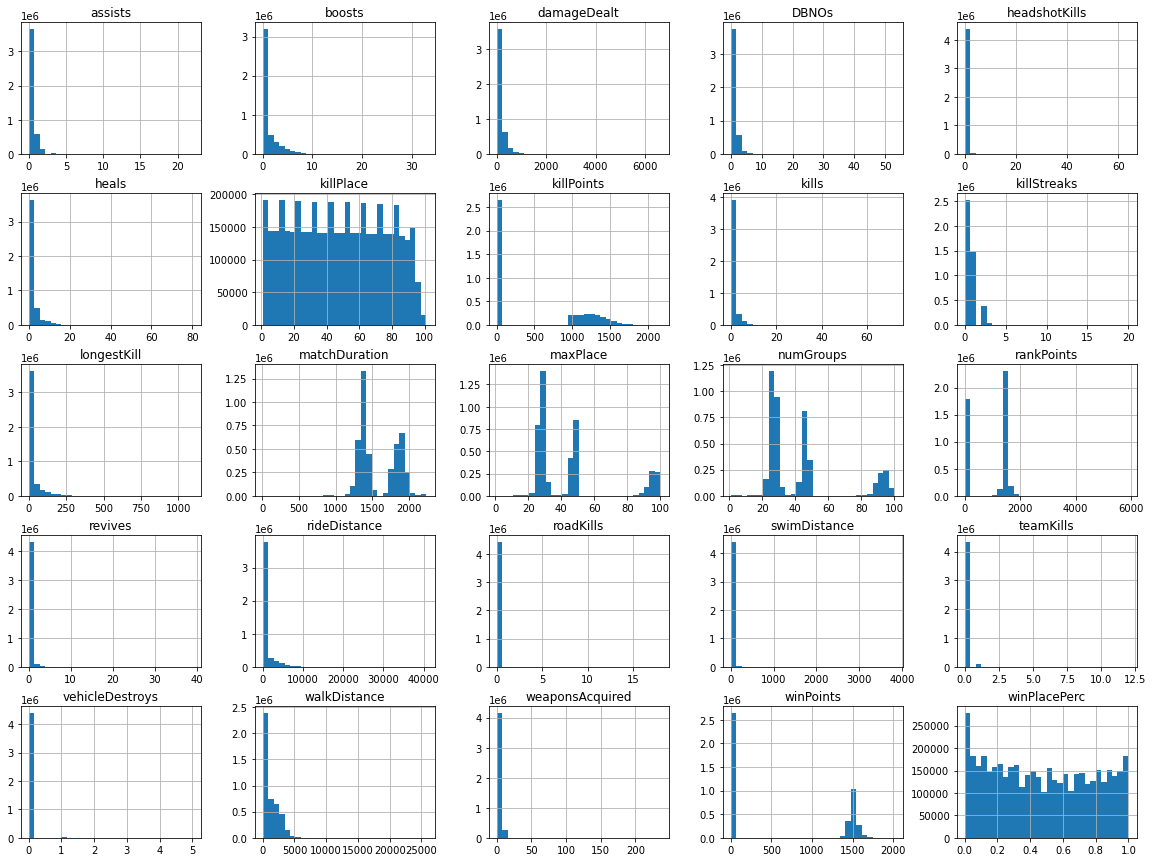

In [11]:
# Histograms for numerical variables
df.hist(bins=30, figsize=(20, 15))
plt.show()

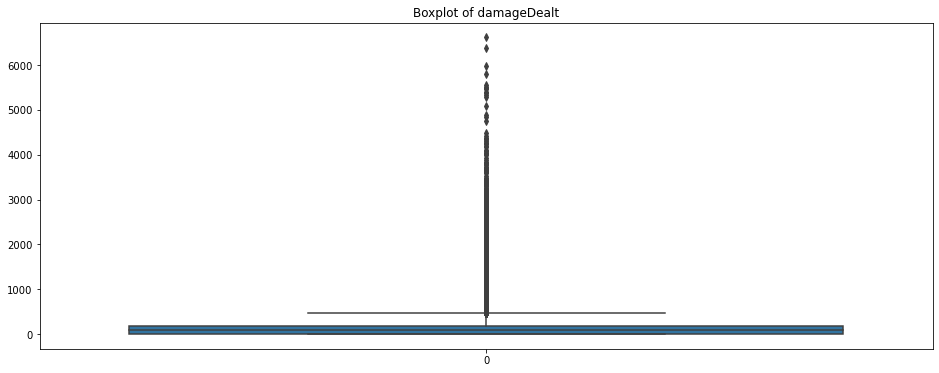

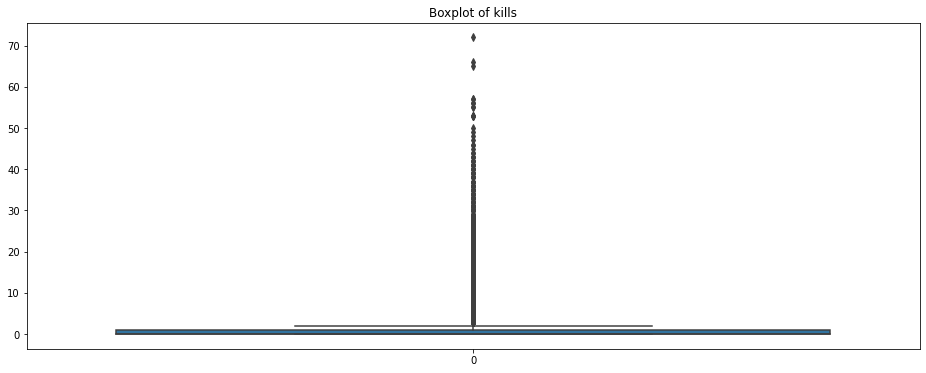

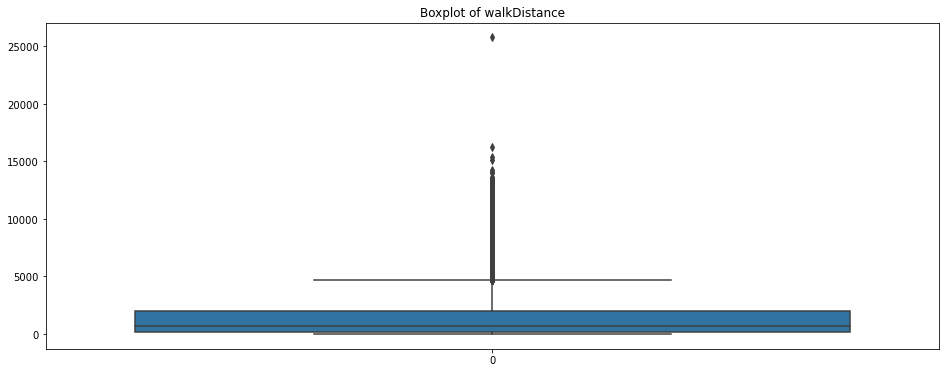

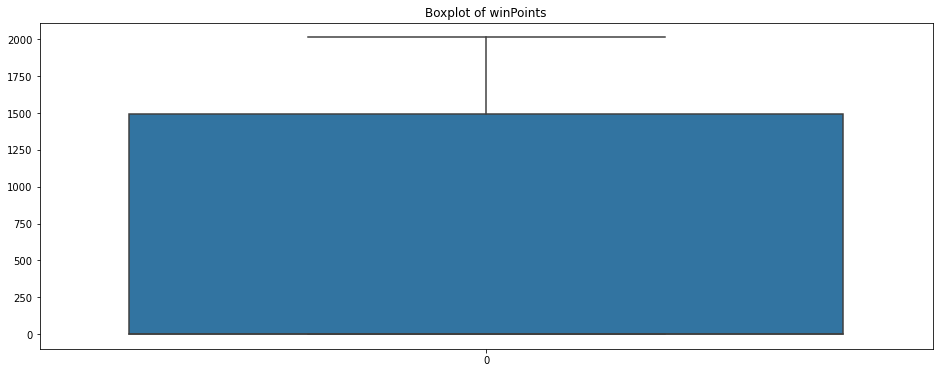

In [12]:
# Boxplots for detecting outliers
for column in ['damageDealt', 'kills', 'walkDistance', 'winPoints']:
    sns.boxplot(data=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

In [13]:
#Categorical variables analysis;

squad-fpp           1756186
duo-fpp              996691
squad                626526
solo-fpp             536762
duo                  313591
solo                 181943
normal-squad-fpp      17174
crashfpp               6287
normal-duo-fpp         5489
flaretpp               2505
normal-solo-fpp        1682
flarefpp                718
normal-squad            516
crashtpp                371
normal-solo             326
normal-duo              199
Name: matchType, dtype: int64


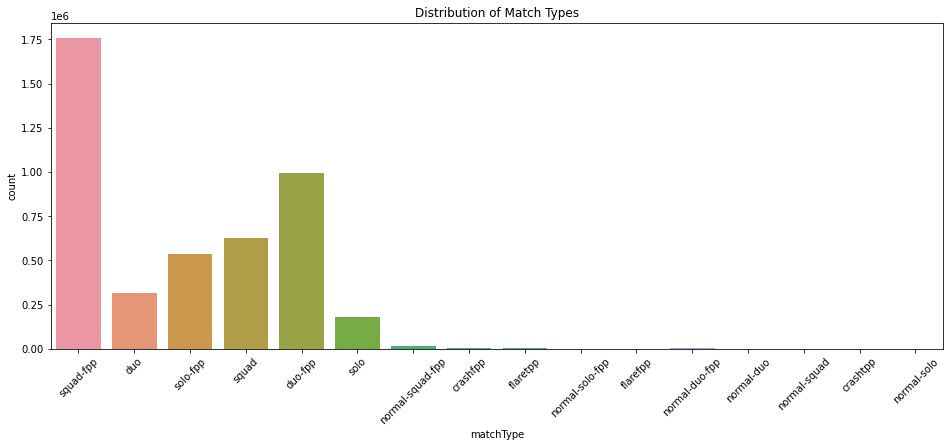

In [14]:
# Frequency counts
print(df['matchType'].value_counts())

# Count plot for match types
sns.countplot(data=df, x='matchType')
plt.title('Distribution of Match Types')
plt.xticks(rotation=45)
plt.show()

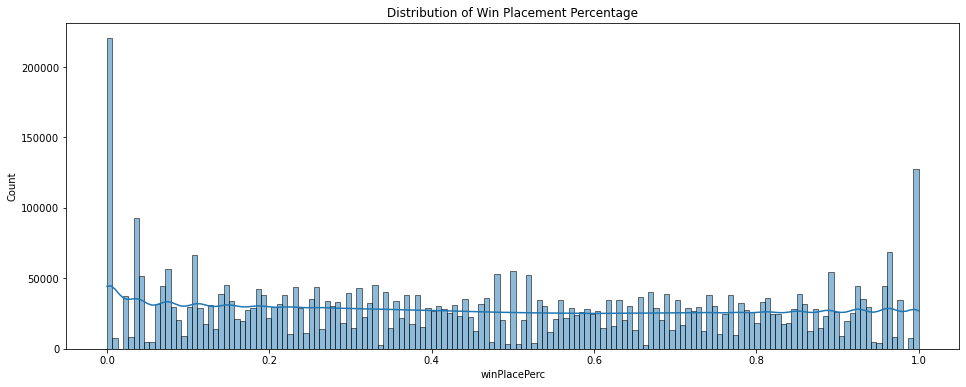

In [15]:
sns.histplot(df['winPlacePerc'], kde=True)
plt.title('Distribution of Win Placement Percentage')
plt.show()

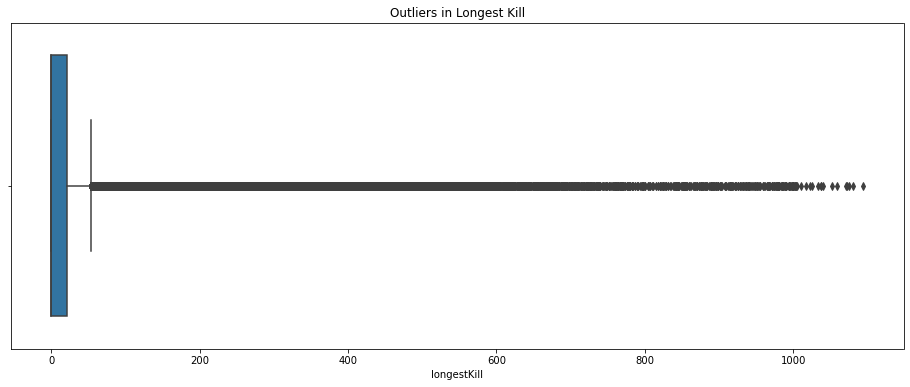

In [16]:
# Boxplot for detecting outliers
sns.boxplot(x=df['longestKill'])
plt.title('Outliers in Longest Kill')
plt.show()

In [17]:
print("Skewness:")
print(df.skew())

print("\nKurtosis:")
print(df.kurtosis())

Skewness:
assists             3.567609
boosts              1.949959
damageDealt         2.958920
DBNOs               3.201537
headshotKills       5.218261
heals               3.444345
killPlace           0.026424
killPoints          0.519117
kills               3.362907
killStreaks         1.252573
longestKill         3.944918
matchDuration       0.276002
maxPlace            1.354722
numGroups           1.361652
rankPoints         -0.366956
revives             4.290687
rideDistance        3.346419
roadKills          36.934921
swimDistance       14.723097
teamKills           8.194191
vehicleDestroys    12.723040
walkDistance        1.092797
weaponsAcquired     2.572307
winPoints           0.405358
winPlacePerc        0.098830
dtype: float64

Kurtosis:
assists              21.230740
boosts                4.299439
damageDealt          20.112894
DBNOs                22.830951
headshotKills       106.213597
heals                18.699277
killPlace            -1.184335
killPoints           -

   ### *Bivariate Analysis*

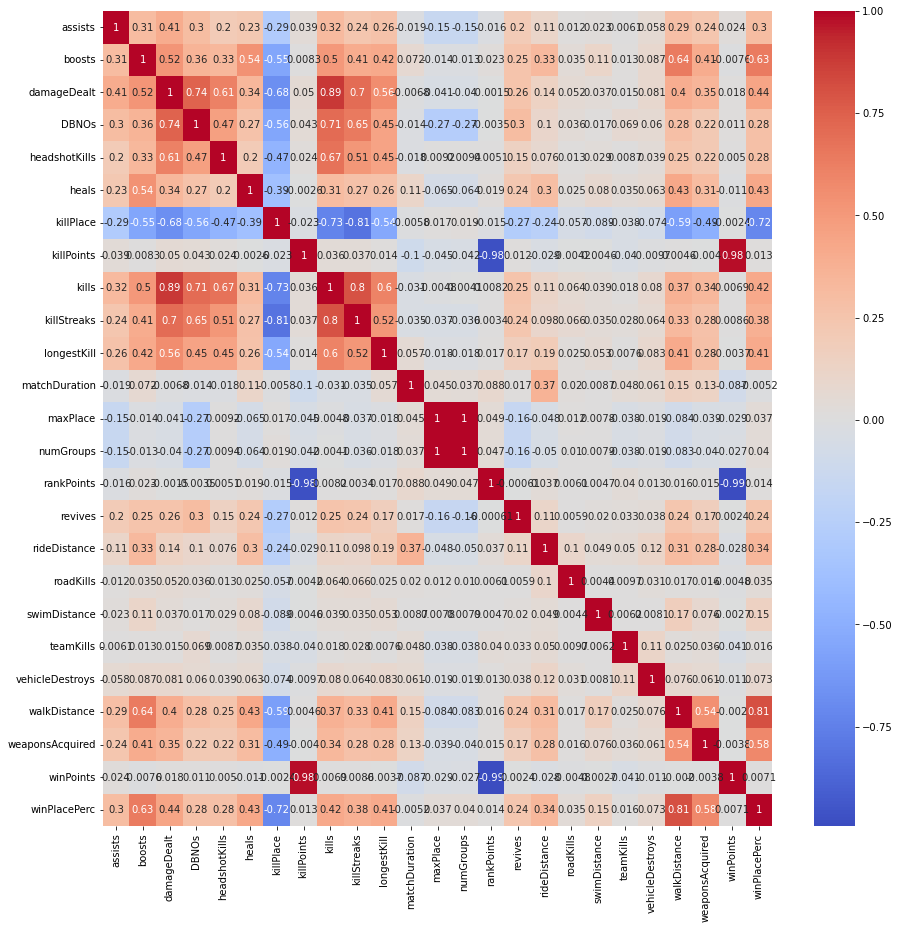

In [18]:
# Select only numeric columns from the dataframe
numeric_df = df.select_dtypes(include=['number'])

# Set the figure size and generate a heatmap displaying correlations between numeric features
plt.figure(figsize=(15, 15))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.show()

#### **Bivariate Analysis Overview**:

Bivariate analysis examines the relationship between two variables to understand how they interact and influence each other. Here are key insights gained from this type of correlation analysis:

**Pearson Correlation Coefficient:**

Bivariate analysis involves calculating the Pearson correlation coefficient, which measures the strength and direction of the linear relationship between two continuous variables. This helps in identifying variables that are either positively or negatively associated.

**Heatmaps:**
Heatmaps are often used in bivariate analysis to visualize the correlation matrix between multiple variables. They provide a clear overview of relationships, making it easier to identify clusters or groups of highly correlated variables.

Through bivariate analysis, analysts gain valuable insights into variable interactions, uncover meaningful patterns, and identify associations. This knowledge plays a crucial role in building predictive models, improving forecasts, and guiding data-driven decisions.

In [19]:
#Checking for duplicates and missing data

In [20]:
df.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
4446961    False
4446962    False
4446963    False
4446964    False
4446965    False
Length: 4446966, dtype: bool

In [21]:
df.duplicated().sum()

0

In [22]:
df.isna().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [23]:
df[df['winPlacePerc'].isnull()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,...,0,0.0,0,0.0,0,0,0.0,0,0,NaN


In [24]:
df.drop(2744604, inplace = True)

In [25]:
df.isna().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64

### **Analyzing Player Distribution in PUBG Data**

In [26]:
df['playerjoined']=df.groupby('matchId')['matchId'].transform('count')
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playerjoined
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0.0000,0,0.00,0,0,244.80,1,1466,0.4444,96
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0.0045,0,11.04,0,0,1434.00,5,0,0.6400,91
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0.0000,0,0.00,0,0,161.80,2,0,0.7755,98
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0.0000,0,0.00,0,0,202.70,3,0,0.1667,91
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0.0000,0,0.00,0,0,49.75,2,0,0.1875,97


   **Kills Without Moving**

Players with zero or near-zero walkDistance and at least 1 or more kills could be classified as having "kills without moving."
These players may have camped or taken long-range sniper shots.

In [27]:
df['totaldistance'] = df['walkDistance'] + df['swimDistance'] + df['rideDistance']

In [28]:
df['killwithoutmoving'] = ((df['kills'] > 0) & (df['totaldistance'] == 0))

In [29]:
anomalous_kills = df[df['killwithoutmoving']]
print(f"Number of players who killed without moving: {len(anomalous_kills)}")
anomalous_kills[['kills', 'totaldistance', 'damageDealt', 'longestKill', 'winPlacePerc']]

Number of players who killed without moving: 1535


,kills,totaldistance,damageDealt,longestKill,winPlacePerc
1824,6,0.0,593.000,23.540,0.8571
6673,3,0.0,346.600,6.523,0.6000
11892,20,0.0,1750.000,37.080,0.8947
14631,1,0.0,157.800,21.540,0.0000
15591,1,0.0,100.000,55.430,0.3000
...,...,...,...,...,...
4440232,1,0.0,4.316,41.250,0.8889
4440898,1,0.0,90.830,48.230,0.0000
4440927,6,0.0,909.100,154.800,0.6000
4441511,9,0.0,696.400,89.520,0.9000


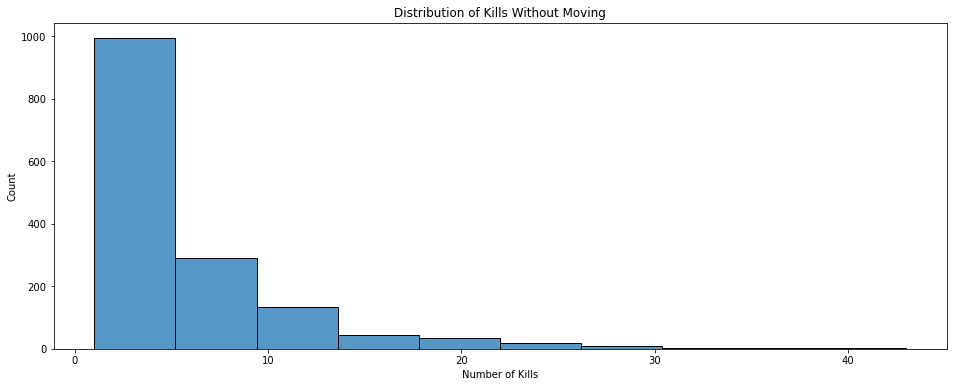

In [30]:
sns.histplot(anomalous_kills['kills'], bins=10, kde=False)
plt.title('Distribution of Kills Without Moving')
plt.xlabel('Number of Kills')
plt.show()

In [31]:
df[df['roadKills']>=5].shape

(82, 32)

In [32]:
df.drop(df[df['roadKills']>=5].index , inplace= True)

In [33]:
# data dimension
df[df['kills'] > 20].shape

(463, 32)

In [34]:
# drop the instances
df.drop(df[df['kills'] > 20].index, inplace = True)

In [35]:
df['headshot_rate'] = df['headshotKills'] / df['kills']
df['headshot_rate'] = df['headshot_rate'].fillna(0)

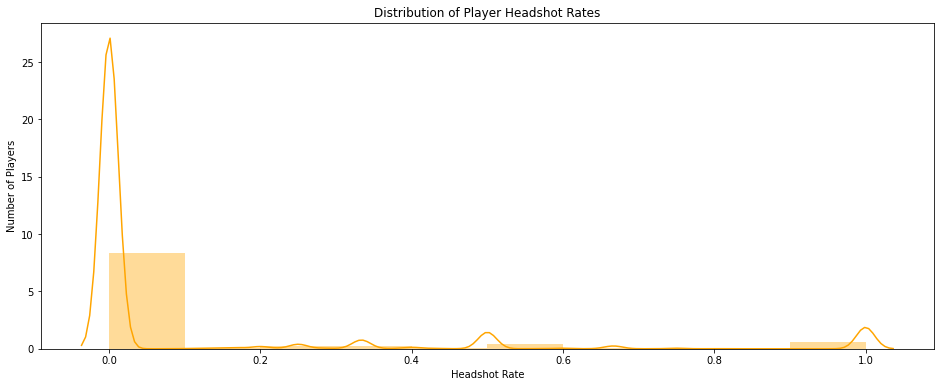

In [36]:
#Plot the Headshot Rate Distribution:
sns.distplot(df['headshot_rate'], bins=10, color='orange').set_title("Distribution of Player Headshot Rates")
plt.ylabel("Number of Players")
plt.xlabel("Headshot Rate")
plt.show()

Low headshot rates are common:

- The majority of players are expected to have a headshot rate close to 0 since most kills in PUBG are typically not headshots.
 High headshot rate players:

- Players with a headshot rate between 0.8 and 1.0 are likely skilled marksmen or snipers who frequently land headshots.
 Potential Outliers:

- Players clustered near a headshot rate of 1.0 could indicate highly skilled players or possibly unusual gameplay behavior    worth investigating.

In [37]:
df[(df['headshot_rate'] ==1) & (df['kills']>5)].shape

(188, 33)

In [38]:
df.drop(df[(df['headshot_rate'] == 1)& (df['kills'] > 6)].index, inplace = True)

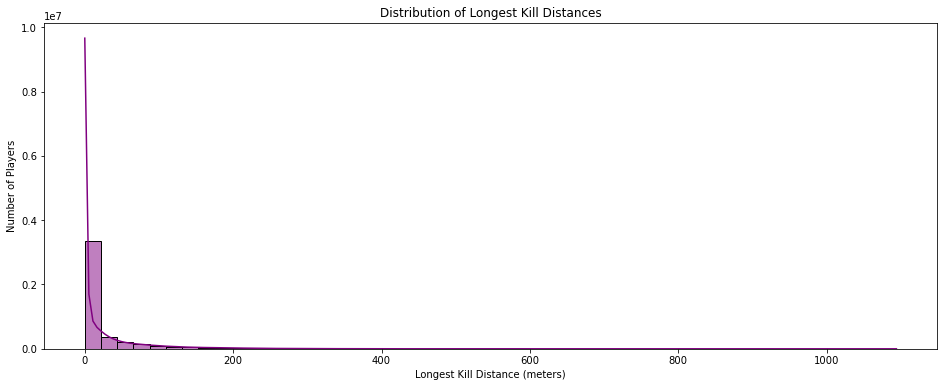

In [39]:
#Longest Shot
# Custom color and updated title
sns.histplot(df['longestKill'], bins=50, kde=True, color='purple').set_title("Distribution of Longest Kill Distances")
plt.ylabel("Number of Players")
plt.xlabel("Longest Kill Distance (meters)")
plt.show()

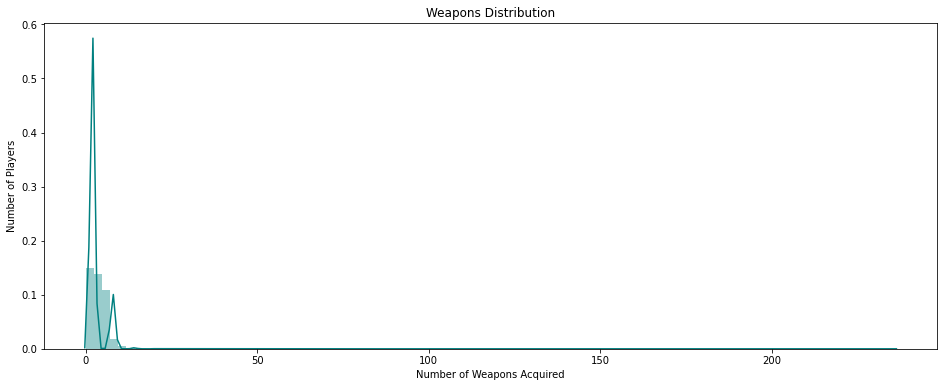

In [40]:
#Weapon change
sns.distplot(df['weaponsAcquired'], bins=100, kde=True, color='teal').set_title("Weapons Distribution")
plt.xlabel("Number of Weapons Acquired")
plt.ylabel("Number of Players")
plt.show()

In [41]:
df.drop(df[df['weaponsAcquired']>=15].index, inplace = True)

In [42]:
df[df['weaponsAcquired']>=15].shape

(0, 33)

### **Feature Engineering**


In [43]:
normalising_factor = (100 - df['playerjoined']/100)+1

In [44]:
# Normalize key variables using the normalizing factor
df['killsNorm'] = df['kills'] * normalising_factor
df['damageDealtNorm'] = df['damageDealt'] * normalising_factor
df['maxPlaceNorm'] = df['maxPlace'] * normalising_factor
df['matchDurationNorm'] = df['matchDuration'] * normalising_factor

# Calculate total travel distance across different modes of movement
df['traveldistance'] = df['walkDistance'] + df['swimDistance'] + df['rideDistance']

# Combine healing and boosting items into a single metric
df['healsnboosts'] = df['heals'] + df['boosts']

# Sum assists and revives into a single support-related metric
df['assist'] = df['assists'] + df['revives']

In [45]:
df.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc', 'playerjoined',
       'totaldistance', 'killwithoutmoving', 'headshot_rate', 'killsNorm',
       'damageDealtNorm', 'maxPlaceNorm', 'matchDurationNorm',
       'traveldistance', 'healsnboosts', 'assist'],
      dtype='object')

In [46]:
data = df.drop(columns = ['Id', 'groupId', 'matchId', 'assists', 'boosts', 'walkDistance', 'swimDistance', 
                          'rideDistance', 'heals', 'revives', 'kills', 'damageDealt', 'maxPlace', 'matchDuration','killwithoutmoving'])
data.head()

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,matchType,numGroups,rankPoints,roadKills,...,playerjoined,totaldistance,headshot_rate,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,traveldistance,healsnboosts,assist
0,0,0,60,1241,0,0.00,squad-fpp,26,-1,0,...,96,244.8000,0.0,0.00,0.0000,2801.12,130652.24,244.8000,0,0
1,0,0,57,0,0,0.00,squad-fpp,25,1484,0,...,91,1445.0445,0.0,0.00,9155.2323,2602.34,177859.93,1445.0445,0,0
2,0,0,47,0,0,0.00,duo,47,1491,0,...,98,161.8000,0.0,0.00,6801.3600,5001.00,131826.36,161.8000,0,1
3,0,0,75,0,0,0.00,squad-fpp,30,1408,0,...,91,202.7000,0.0,0.00,3292.9610,3102.79,143729.24,202.7000,0,0
4,0,0,45,0,1,58.53,solo-fpp,95,1560,0,...,97,49.7500,0.0,100.03,10003.0000,9702.91,142442.72,49.7500,0,0


In [47]:
data.columns

Index(['DBNOs', 'headshotKills', 'killPlace', 'killPoints', 'killStreaks',
       'longestKill', 'matchType', 'numGroups', 'rankPoints', 'roadKills',
       'teamKills', 'vehicleDestroys', 'weaponsAcquired', 'winPoints',
       'winPlacePerc', 'playerjoined', 'totaldistance', 'headshot_rate',
       'killsNorm', 'damageDealtNorm', 'maxPlaceNorm', 'matchDurationNorm',
       'traveldistance', 'healsnboosts', 'assist'],
      dtype='object')

In [48]:
data.matchType.unique()

array(['squad-fpp', 'duo', 'solo-fpp', 'squad', 'duo-fpp', 'solo',
       'normal-squad-fpp', 'crashfpp', 'flaretpp', 'normal-solo-fpp',
       'flarefpp', 'normal-duo-fpp', 'normal-squad', 'crashtpp',
       'normal-solo', 'normal-duo'], dtype=object)

## **Data Encoding**

In [49]:
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()

data.matchType=lc.fit_transform(data.matchType)


data.head()

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,matchType,numGroups,rankPoints,roadKills,...,playerjoined,totaldistance,headshot_rate,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,traveldistance,healsnboosts,assist
0,0,0,60,1241,0,0.00,15,26,-1,0,...,96,244.8000,0.0,0.00,0.0000,2801.12,130652.24,244.8000,0,0
1,0,0,57,0,0,0.00,15,25,1484,0,...,91,1445.0445,0.0,0.00,9155.2323,2602.34,177859.93,1445.0445,0,0
2,0,0,47,0,0,0.00,2,47,1491,0,...,98,161.8000,0.0,0.00,6801.3600,5001.00,131826.36,161.8000,0,1
3,0,0,75,0,0,0.00,15,30,1408,0,...,91,202.7000,0.0,0.00,3292.9610,3102.79,143729.24,202.7000,0,0
4,0,0,45,0,1,58.53,13,95,1560,0,...,97,49.7500,0.0,100.03,10003.0000,9702.91,142442.72,49.7500,0,0


Skipping non-numeric column: 'matchType'


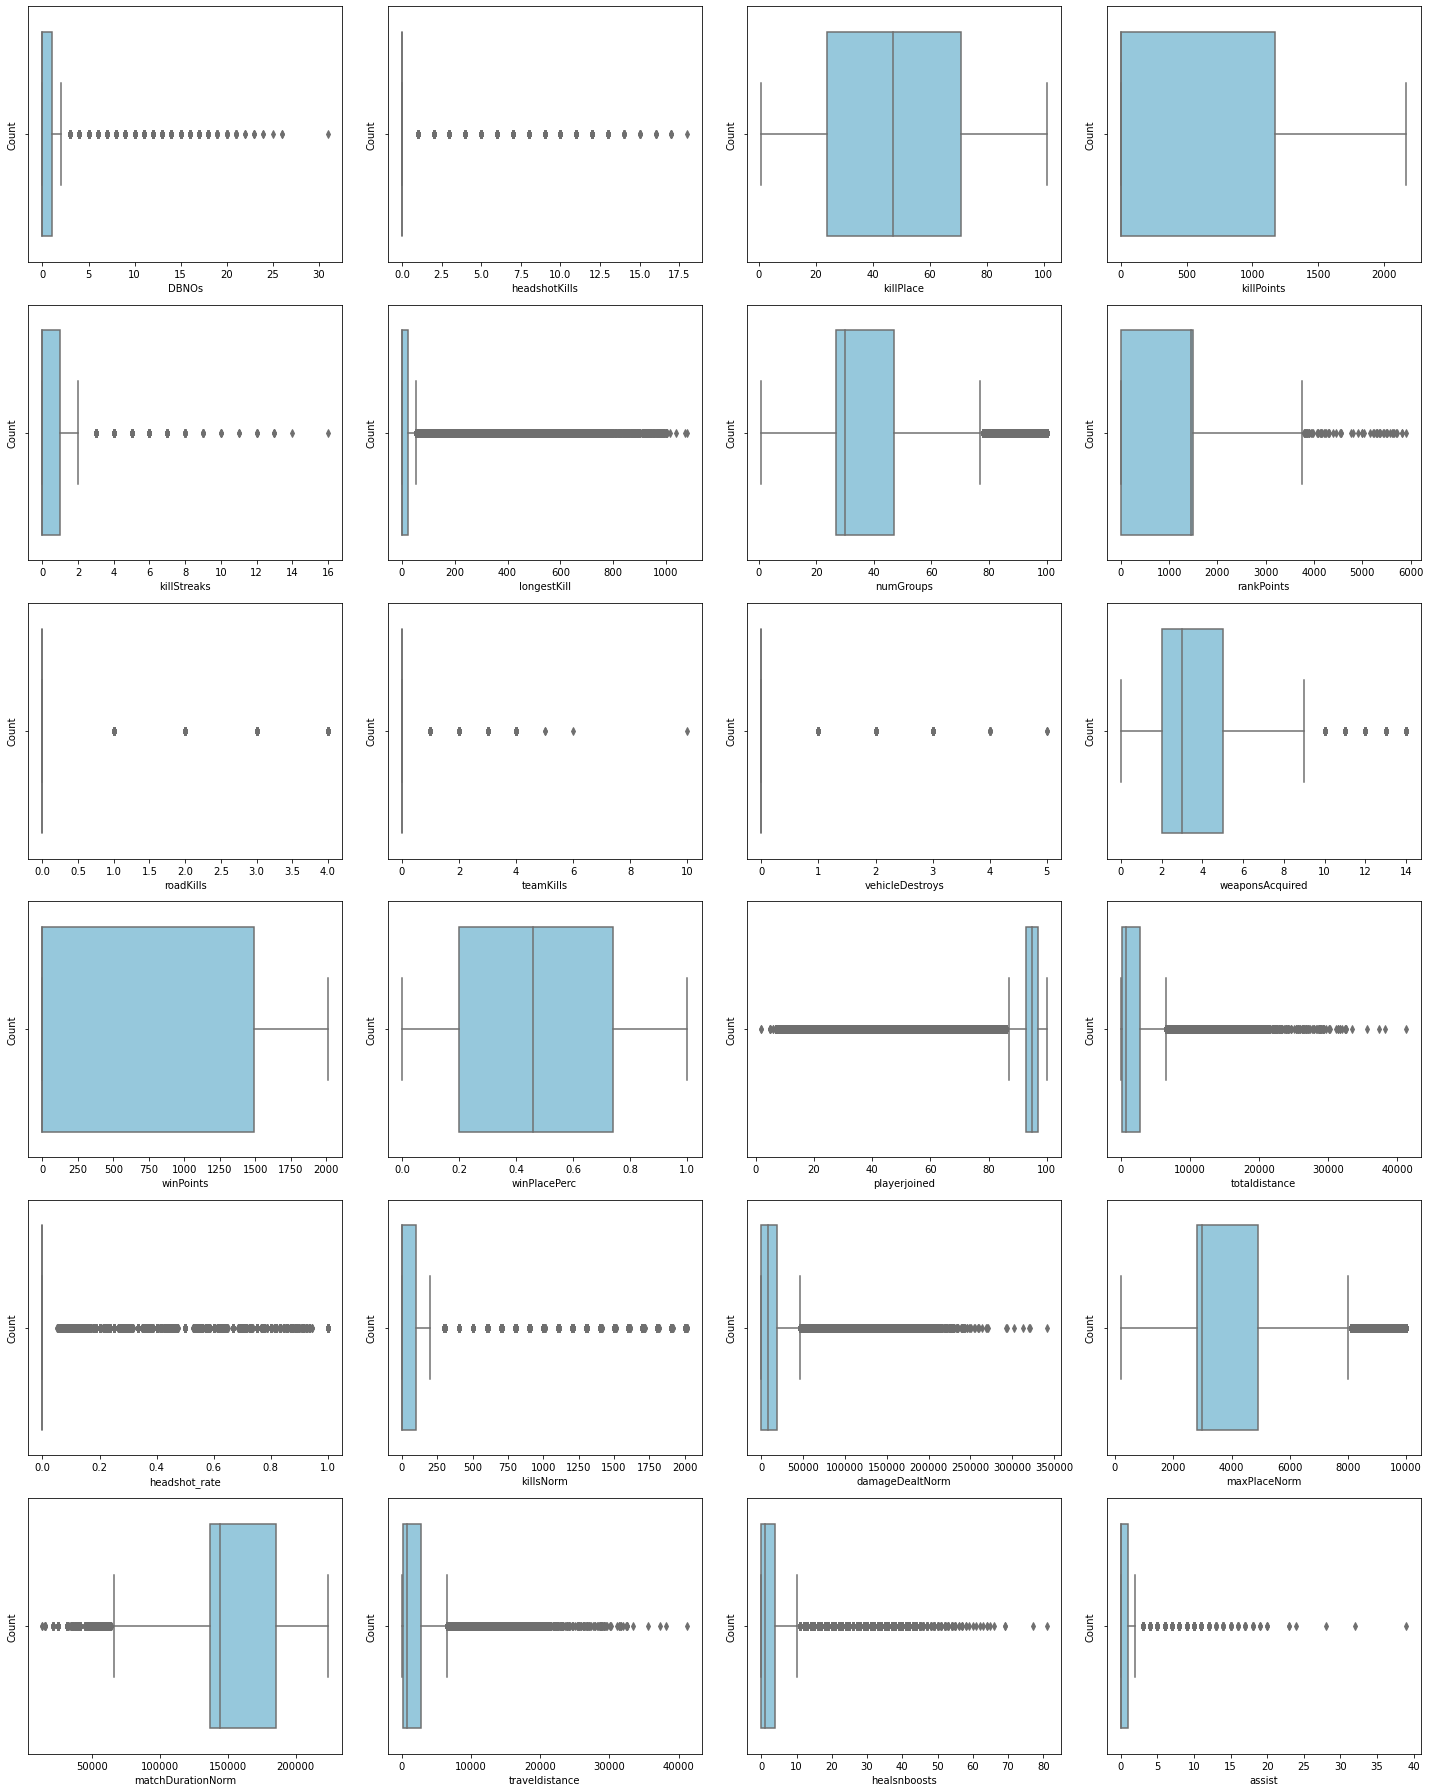

In [50]:
# Set figure size for multiple subplots
plt.figure(figsize=(20, 25))
plotnumber = 1

# Iterate through each column in the dataset and plot if it is numeric
for column in data.columns:
    if plotnumber <= 25:
        ax = plt.subplot(6, 4, plotnumber)
        
        # Check if the column contains numeric data before plotting
        if data[column].dtype in ['int64', 'float64']:
            sns.boxplot(x=data[column], color='skyblue', saturation=0.7)
            plt.xlabel(column)
            plt.ylabel('Count')
        else:
            print(f"Skipping non-numeric column: '{column}'")
            plotnumber -= 1  # Adjust plot number to maintain correct subplot alignment
    
    plotnumber += 1

# Adjust layout to prevent overlapping plots
plt.tight_layout()
plt.show()

In [51]:
import numpy as np
from scipy import stats

col = 1
for c in data.columns:  # Iterating through each column in the DataFrame
    if col <= 25:
        # Calculate the interquartile range (IQR)
        IQR = stats.iqr(data[c], interpolation='midpoint')
        print(f"{c} IQR: {IQR}")
        
        # Compute the first (Q1) and third (Q3) quartiles
        Q1 = data[c].quantile(0.25)
        Q3 = data[c].quantile(0.75)
        
        # Determine the minimum and maximum limits for outlier detection
        min_limit = Q1 - 1.5 * IQR
        print(f"{c} min_limit: {min_limit}")
        max_limit = Q3 + 1.5 * IQR
        print(f"{c} max_limit: {max_limit}\n")

        # Replace any outliers with the column median
        data.loc[(data[c] < min_limit) | (data[c] > max_limit), c] = np.median(data[c])

        # Verify that the outliers were successfully replaced
        replaced_outliers = data.loc[(data[c] < min_limit) | (data[c] > max_limit), c]
        print(f"Outliers replaced in {c}: {replaced_outliers}\n")
    
    col += 1


DBNOs IQR: 1.0
DBNOs min_limit: -1.5
DBNOs max_limit: 2.5

Outliers replaced in DBNOs: Series([], Name: DBNOs, dtype: int64)

headshotKills IQR: 0.0
headshotKills min_limit: 0.0
headshotKills max_limit: 0.0

Outliers replaced in headshotKills: Series([], Name: headshotKills, dtype: int64)

killPlace IQR: 47.0
killPlace min_limit: -46.5
killPlace max_limit: 141.5

Outliers replaced in killPlace: Series([], Name: killPlace, dtype: int64)

killPoints IQR: 1172.0
killPoints min_limit: -1758.0
killPoints max_limit: 2930.0

Outliers replaced in killPoints: Series([], Name: killPoints, dtype: int64)

killStreaks IQR: 1.0
killStreaks min_limit: -1.5
killStreaks max_limit: 2.5

Outliers replaced in killStreaks: Series([], Name: killStreaks, dtype: int64)

longestKill IQR: 21.18
longestKill min_limit: -31.77
longestKill max_limit: 52.95

Outliers replaced in longestKill: Series([], Name: longestKill, dtype: float64)

matchType IQR: 12.0
matchType min_limit: -15.0
matchType max_limit: 33.0

Outli

Skipping non-numeric column: 'matchType'


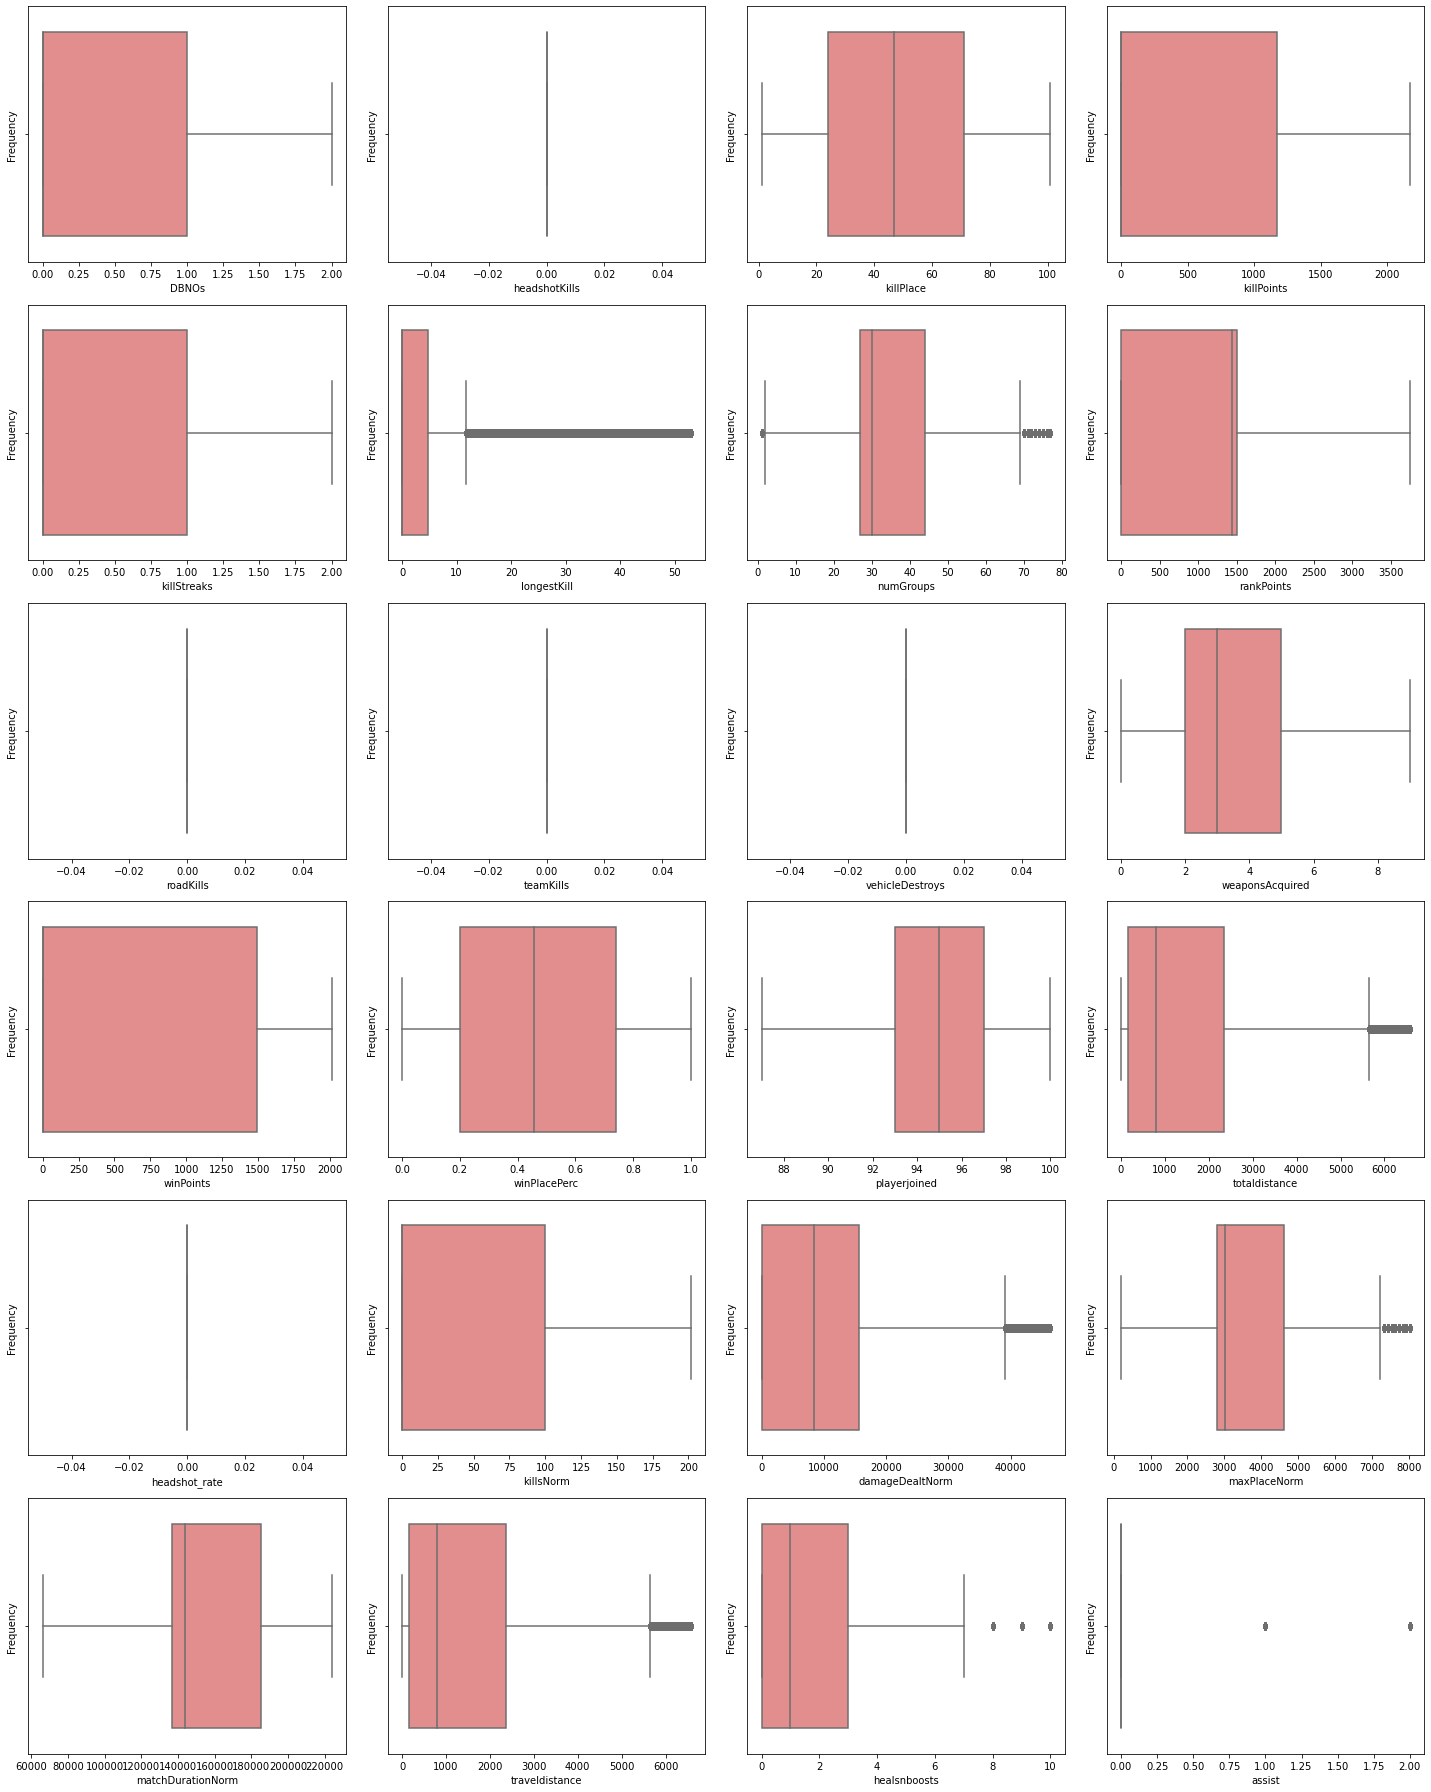

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size for multiple subplots
plt.figure(figsize=(20, 25))
plotnumber = 1

# Iterate through each column in the dataset
for column in data.columns:
    if plotnumber <= 25:
        ax = plt.subplot(6, 4, plotnumber)
        
        # Only plot numeric columns
        if data[column].dtype in ['int64', 'float64']:
            # Plot boxplot with custom color
            sns.boxplot(x=data[column], color='lightcoral')
            plt.xlabel(column, fontsize=10)
            plt.ylabel('Frequency', fontsize=10)
        else:
            print(f"Skipping non-numeric column: '{column}'")
            plotnumber -= 1  # Adjust plot number for alignment
    
    plotnumber += 1

# Ensure proper spacing between subplots
plt.tight_layout()
plt.show()


In [53]:
x = data.drop(['winPlacePerc'], axis = 1)
y = data['winPlacePerc']
features = x.columns

In [54]:
#Data Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x =scaler.fit_transform(x)

data.columns

Index(['DBNOs', 'headshotKills', 'killPlace', 'killPoints', 'killStreaks',
       'longestKill', 'matchType', 'numGroups', 'rankPoints', 'roadKills',
       'teamKills', 'vehicleDestroys', 'weaponsAcquired', 'winPoints',
       'winPlacePerc', 'playerjoined', 'totaldistance', 'headshot_rate',
       'killsNorm', 'damageDealtNorm', 'maxPlaceNorm', 'matchDurationNorm',
       'traveldistance', 'healsnboosts', 'assist'],
      dtype='object')

In [55]:
x

array([[-0.61776514,  0.        ,  0.44991805, ..., -0.73316506,
        -0.6995335 , -0.50422389],
       [-0.61776514,  0.        ,  0.34064828, ...,  0.02163026,
        -0.6995335 , -0.50422389],
       [-0.61776514,  0.        , -0.0235843 , ..., -0.7853611 ,
        -0.6995335 ,  1.26713178],
       ...,
       [-0.61776514,  0.        ,  0.6684576 , ..., -0.38975033,
        -0.6995335 , -0.50422389],
       [ 0.92944613,  0.        , -1.33482158, ...,  0.84101724,
         1.63153321,  3.03848745],
       [-0.61776514,  0.        , -1.07985877, ...,  0.75612006,
         0.46599985, -0.50422389]])

In [56]:
# Convert the data to a DataFrame and assign appropriate column names
x = pd.DataFrame(x, columns=[
    'DBNOs', 'headshotKills', 'killPlace', 'killPoints', 'killStreaks',
    'longestKill', 'matchType', 'numGroups', 'rankPoints', 'roadKills',
    'teamKills', 'vehicleDestroys', 'weaponsAcquired', 'winPoints',
    'playerjoined', 'totaldistance', 'headshot_rate', 'killsNorm',
    'damageDealtNorm', 'maxPlaceNorm', 'matchDurationNorm',
    'traveldistance', 'healsnboosts', 'assist'
])

In [57]:
x

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,matchType,numGroups,rankPoints,roadKills,...,playerjoined,totaldistance,headshot_rate,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,traveldistance,healsnboosts,assist
0,-0.617765,0.0,0.449918,1.172453,-0.776944,-0.485278,0.782374,-0.803366,-1.212541,0.0,...,0.303696,-0.733165,0.0,-0.623947,-0.943695,-0.676873,-1.068770,-0.733165,-0.699534,-0.504224
1,-0.617765,0.0,0.340648,-0.804732,-0.776944,-0.485278,0.782374,-0.915426,0.803762,0.0,...,-1.443665,0.021630,0.0,-0.623947,-0.098873,-0.892972,0.766746,0.021630,-0.699534,-0.504224
2,-0.617765,0.0,-0.023584,-0.804732,-0.776944,-0.485278,-1.657012,1.549890,0.813267,0.0,...,1.002641,-0.785361,0.0,-0.623947,-0.316082,1.714676,-1.023118,-0.785361,-0.699534,1.267132
3,-0.617765,0.0,0.996267,-0.804732,-0.776944,-0.485278,0.782374,-0.355127,0.700571,0.0,...,-1.443665,-0.759640,0.0,-0.623947,-0.639829,-0.348919,-0.560314,-0.759640,-0.699534,-0.504224
4,-0.617765,0.0,-0.096431,-0.804732,0.758302,-0.485278,0.407084,-0.355127,0.906953,0.0,...,0.653168,-0.855826,0.0,0.855761,-0.020643,-0.458382,-0.610336,-0.855826,-0.699534,-0.504224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4438861,-0.617765,0.0,0.959844,0.834690,-0.776944,-0.485278,0.782374,-0.579247,-1.212541,0.0,...,-0.395248,0.566202,0.0,-0.623947,-0.943695,-0.567486,1.138162,0.566202,-0.699534,-0.504224
4438862,-0.617765,0.0,0.777727,-0.804732,-0.776944,-0.485278,0.219439,-0.355127,0.826844,0.0,...,-0.744720,-0.835733,0.0,-0.623947,-0.536004,-0.458382,-0.565321,-0.835733,-0.311022,-0.504224
4438863,-0.617765,0.0,0.668458,-0.804732,-0.776944,-0.485278,0.782374,-0.579247,0.825487,0.0,...,1.002641,-0.389750,0.0,-0.623947,-0.398595,-0.677481,-1.011451,-0.389750,-0.699534,-0.504224
4438864,0.929446,0.0,-1.334822,-0.804732,0.758302,-0.485278,0.782374,-0.915426,0.714149,0.0,...,-0.395248,0.841017,0.0,2.336357,0.721990,-0.893820,-0.807090,0.841017,1.631533,3.038487


In [58]:
y

0          0.4444
1          0.6400
2          0.7755
3          0.1667
4          0.1875
            ...  
4446961    0.1786
4446962    0.2935
4446963    0.4815
4446964    0.8000
4446965    0.5464
Name: winPlacePerc, Length: 4438866, dtype: float64

In [59]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=20)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3107206, 24) (3107206,)
(1331660, 24) (1331660,)


In [60]:
X_train

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,matchType,numGroups,rankPoints,roadKills,...,playerjoined,totaldistance,headshot_rate,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,traveldistance,healsnboosts,assist
1369514,-0.617765,0.0,0.158532,-0.804732,-0.776944,-0.485278,0.782374,-0.691306,0.825487,0.0,...,-2.492081,1.427122,0.0,-0.623947,-0.943695,-0.674437,0.889497,1.427122,-0.699534,-0.504224
505588,-0.617765,0.0,1.542616,-0.804732,-0.776944,-0.485278,0.407084,-0.355127,1.136418,0.0,...,-1.094192,-0.879937,0.0,-0.623947,-0.546584,-0.458382,-0.556981,-0.879937,-0.699534,-0.504224
2291806,-0.617765,0.0,0.304225,-0.804732,-0.776944,-0.485278,0.782374,-0.803366,0.806478,0.0,...,-2.492081,2.479847,0.0,-0.623947,-0.409876,-0.783280,0.753248,2.479847,0.077489,-0.504224
2064774,-0.617765,0.0,1.178383,0.802826,-0.776944,-0.485278,0.782374,-0.579247,-1.212541,0.0,...,1.701585,-0.783223,0.0,-0.623947,-0.943695,-0.569377,-0.646990,-0.783223,-0.699534,-0.504224
4109610,0.929446,0.0,0.486341,1.065707,-0.776944,-0.485278,0.782374,-0.579247,-1.212541,0.0,...,1.701585,-0.260068,0.0,-0.623947,0.287287,-0.678090,-0.736418,-0.260068,-0.699534,-0.504224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3149643,-0.617765,0.0,0.122109,-0.804732,-0.776944,-0.485278,0.782374,-0.803366,0.849927,0.0,...,-1.443665,1.465169,0.0,-0.623947,-0.154936,-0.892972,1.101430,1.465169,1.631533,-0.504224
1697172,0.929446,0.0,0.996267,-0.804732,-0.776944,-0.485278,0.594729,-0.579247,0.873009,0.0,...,-0.744720,-0.689333,0.0,-0.623947,-0.467671,-0.675959,1.640815,-0.689333,0.077489,-0.504224
3890076,-0.617765,0.0,0.377072,1.234588,-0.776944,-0.485278,0.594729,-0.691306,-1.212541,0.0,...,1.002641,0.102726,0.0,-0.623947,-0.432929,-0.786216,-0.840337,0.102726,0.466000,-0.504224
2976218,2.476657,0.0,-1.043436,-0.804732,2.293548,3.979394,-1.469367,1.325771,0.829560,0.0,...,0.303696,-0.015501,0.0,2.335765,1.502637,1.498251,-0.874284,-0.015501,-0.311022,-0.504224


In [61]:
y_train

1372022    0.5185
506504     0.0110
2295951    0.4615
2068503    0.2500
4117118    0.4815
            ...  
3155473    0.8400
1700241    0.0741
3897170    0.5385
2981720    0.5532
1033457    0.5000
Name: winPlacePerc, Length: 3107206, dtype: float64

### **Task 2:-Create a predictive model which is an attempt to predict the win probability of the Pubg match and to look at the important factors affecting the win probability of the pubg game. **

In [62]:
#Importing libraries for building the model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [63]:
#Model Evaluation
#Define the models to evaluate
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'XGBoost Regressor': XGBRegressor(),
    'AdaBoost Regressor': AdaBoostRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor()
}

model_list = []  # List to store model names
r2_list = []     # List to store R² scores for the test set

# Iterate through each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Generate predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate the model on training and test data
    train_mae, train_rmse, train_r2 = evaluate_model(y_train, y_train_pred)
    test_mae, test_rmse, test_r2 = evaluate_model(y_test, y_test_pred)

    # Store model name and test R² score
    model_list.append(model_name)
    r2_list.append(test_r2)

    # Display performance metrics
    print(f"{model_name}\n")
    
    print("Model performance on Training set:")
    print(f"- Root Mean Squared Error: {train_rmse:.4f}")
    print(f"- Mean Absolute Error: {train_mae:.4f}")
    print(f"- R² Score: {train_r2:.4f}")
    
    print("\nModel performance on Test set:")
    print(f"- Root Mean Squared Error: {test_rmse:.4f}")
    print(f"- Mean Absolute Error: {test_mae:.4f}")
    print(f"- R² Score: {test_r2:.4f}")
    
    print("=" * 35 + "\n")

Linear Regression

Model performance on Training set:
- Root Mean Squared Error: 0.1447
- Mean Absolute Error: 0.1061
- R² Score: 0.7781

Model performance on Test set:
- Root Mean Squared Error: 0.1450
- Mean Absolute Error: 0.1062
- R² Score: 0.7775

Decision Tree

Model performance on Training set:
- Root Mean Squared Error: 0.0020
- Mean Absolute Error: 0.0000
- R² Score: 1.0000

Model performance on Test set:
- Root Mean Squared Error: 0.1181
- Mean Absolute Error: 0.0819
- R² Score: 0.8525

XGBoost Regressor

Model performance on Training set:
- Root Mean Squared Error: 0.0830
- Mean Absolute Error: 0.0594
- R² Score: 0.9270

Model performance on Test set:
- Root Mean Squared Error: 0.0837
- Mean Absolute Error: 0.0597
- R² Score: 0.9259

AdaBoost Regressor

Model performance on Training set:
- Root Mean Squared Error: 0.1375
- Mean Absolute Error: 0.1044
- R² Score: 0.7997

Model performance on Test set:
- Root Mean Squared Error: 0.1377
- Mean Absolute Error: 0.1045
- R² Score:

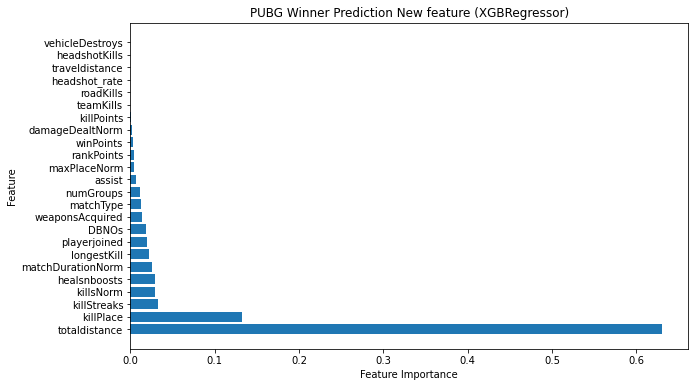

In [72]:
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

feature_importances = xgb_model.feature_importances_
feature_names = x.columns
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_feature_importances)), sorted_feature_importances, align='center')
plt.yticks(range(len(sorted_feature_importances)), sorted_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('PUBG Winner Prediction New feature (XGBRegressor)')
plt.show()

# **Model Comparison Report**

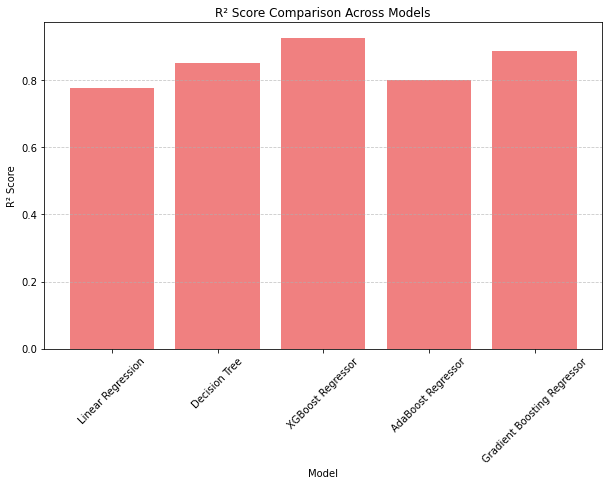

In [73]:
plt.figure(figsize=(10, 6))
plt.bar(model_list, r2_list, color='lightcoral')  # Changed color to lightcoral
plt.xlabel('Model')
plt.ylabel('R² Score')
plt.title('R² Score Comparison Across Models')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Added gridlines for better readability
plt.show()

In [74]:
# Create a DataFrame to store model evaluation results
evaluation_df = pd.DataFrame({
    'Model': model_list,
    'R² Score': r2_list  # Updated the label for clarity
})

# Display the evaluation DataFrame
print(evaluation_df)

# Display as a table (useful in Jupyter Notebook or Google Colab)
display(evaluation_df)

                         Model  R² Score
0            Linear Regression  0.777479
1                Decision Tree  0.852513
2            XGBoost Regressor  0.925914
3           AdaBoost Regressor  0.799371
4  Gradient Boosting Regressor  0.886582


,Model,R² Score
0,Linear Regression,0.777479
1,Decision Tree,0.852513
2,XGBoost Regressor,0.925914
3,AdaBoost Regressor,0.799371
4,Gradient Boosting Regressor,0.886582


In [75]:
# Sort the DataFrame by R² Score in descending order
evaluation_df = evaluation_df.sort_values(by='R² Score', ascending=False)
display(evaluation_df)

,Model,R² Score
2,XGBoost Regressor,0.925914
4,Gradient Boosting Regressor,0.886582
1,Decision Tree,0.852513
3,AdaBoost Regressor,0.799371
0,Linear Regression,0.777479


# **Conclusion**

Based on the evaluation of various machine learning models applied to the PUBG winner prediction task, it can be concluded that XGBRegressor is the best-performing model. This conclusion is supported by several key metrics, including a Root Mean Squared Error (RMSE) of 0.0832, Mean Absolute Error (MAE) of 0.0595, and an impressive R² Score of 0.9265, indicating that the model effectively captures the variance in player outcomes and provides accurate predictions.

In conclusion, the XGBRegressor not only demonstrates high predictive accuracy but also offers valuable insights into key gameplay strategies that contribute to player success in PUBG.